In [1]:
!pip install scikit-learn

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics



In [3]:
from google.colab import files
uploaded = files.upload()



Saving mushroom.csv to mushroom.csv


The project that i worked on is focused on the Mushroom Records information dataset, in order to discover patterns, make predictions and obtain insights. the whole objective is to find patterns between attributes and determine whether a mushroom is edible or poisonous as a means of prediction through machine learning models.


In [4]:
df =pd.read_csv('/content/mushroom.csv')
df.head(10) #Return 10 rows of data


class=e  class=p  cap-shape=b  cap-shape=c  cap-shape=f  cap-shape=k  \
0        0        1            0            0            0            0   
1        1        0            0            0            0            0   
2        1        0            1            0            0            0   
3        0        1            0            0            0            0   
4        1        0            0            0            0            0   
5        1        0            0            0            0            0   
6        1        0            1            0            0            0   
7        1        0            1            0            0            0   
8        0        1            0            0            0            0   
9        1        0            1            0            0            0   

   cap-shape=s  cap-shape=x  cap-surface=f  cap-surface=g  ...  population=s  \
0            0            1              0              0  ...             1   
1            0            1              0              0  ...             0   
2            0            0              0              0  ...             0   
3            0            1              0              0  ...             1   
4            0            1              0              0  ...             0   
5            0            1              0              0  ...             0   
6            0            0              0              0  ...             0   
7            0            0              0              0  ...             1   
8            0            1              0              0  ...             0   
9            0            0              0              0  ...             1   

   population=v  population=y  habitat=d  habitat=g  habitat=l  habitat=m  \
0             0             0          0          0          0          0   
1             0             0          0          1          0          0   
2             0             0          0          0          0          1   
3             0             0          0          0          0          0   
4             0             0          0          1          0          0   
5             0             0          0          1          0          0   
6             0             0          0          0          0          1   
7             0             0          0          0          0          1   
8             1             0          0          1          0          0   
9             0             0          0          0          0          1   

   habitat=p  habitat=u  habitat=w  
0          0          1          0  
1          0          0          0  
2          0          0          0  
3          0          1          0  
4          0          0          0  
5          0          0          0  
6          0          0          0  
7          0          0          0  
8          0          0          0  
9          0          0          0  

[10 rows x 119 columns]

In order to grasp an understanding of the present data,i carefully examined all of the features

In [5]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Columns: 119 entries, class=e to habitat=w
dtypes: int64(119)
memory usage: 7.4 MB


class=e      class=p  cap-shape=b  cap-shape=c  cap-shape=f  \
count  8124.000000  8124.000000  8124.000000  8124.000000  8124.000000   
mean      0.517971     0.482029     0.055638     0.000492     0.387986   
std       0.499708     0.499708     0.229235     0.022185     0.487321   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       1.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     1.000000     0.000000     0.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       cap-shape=k  cap-shape=s  cap-shape=x  cap-surface=f  cap-surface=g  \
count  8124.000000  8124.000000  8124.000000    8124.000000    8124.000000   
mean      0.101920     0.003939     0.450025       0.285574       0.000492   
std       0.302562     0.062641     0.497527       0.451715       0.022185   
min       0.000000     0.000000     0.000000       0.000000       0.000000   
25%       0.000000     0.000000     0.000000       0.000000       0.000000   
50%       0.000000     0.000000     0.000000       0.000000       0.000000   
75%       0.000000     0.000000     1.000000       1.000000       0.000000   
max       1.000000     1.000000     1.000000       1.000000       1.000000   

       ...  population=s  population=v  population=y    habitat=d  \
count  ...   8124.000000   8124.000000   8124.000000  8124.000000   
mean   ...      0.153619      0.497292      0.210734     0.387494   
std    ...      0.360605      0.500023      0.407855     0.487208   
min    ...      0.000000      0.000000      0.000000     0.000000   
25%    ...      0.000000      0.000000      0.000000     0.000000   
50%    ...      0.000000      0.000000      0.000000     0.000000   
75%    ...      0.000000      1.000000      0.000000     1.000000   
max    ...      1.000000      1.000000      1.000000     1.000000   

         habitat=g    habitat=l    habitat=m    habitat=p    habitat=u  \
count  8124.000000  8124.000000  8124.000000  8124.000000  8124.000000   
mean      0.264402     0.102413     0.035943     0.140817     0.045298   
std       0.441041     0.303209     0.186159     0.347854     0.207969   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

         habitat=w  
count  8124.000000  
mean      0.023634  
std       0.151914  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  

[8 rows x 119 columns]

i dropped attributes class e and class p, everything else belongs to x dataframe

In [6]:
x = df.drop(['class=e', 'class=p'], axis=1)
x.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Columns: 117 entries, cap-shape=b to habitat=w
dtypes: int64(117)
memory usage: 7.3 MB


In [7]:
x.head(10)

cap-shape=b  cap-shape=c  cap-shape=f  cap-shape=k  cap-shape=s  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            1            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   
5            0            0            0            0            0   
6            1            0            0            0            0   
7            1            0            0            0            0   
8            0            0            0            0            0   
9            1            0            0            0            0   

   cap-shape=x  cap-surface=f  cap-surface=g  cap-surface=s  cap-surface=y  \
0            1              0              0              1              0   
1            1              0              0              1              0   
2            0              0              0              1              0   
3            1              0              0              0              1   
4            1              0              0              1              0   
5            1              0              0              0              1   
6            0              0              0              1              0   
7            0              0              0              0              1   
8            1              0              0              0              1   
9            0              0              0              1              0   

   ...  population=s  population=v  population=y  habitat=d  habitat=g  \
0  ...             1             0             0          0          0   
1  ...             0             0             0          0          1   
2  ...             0             0             0          0          0   
3  ...             1             0             0          0          0   
4  ...             0             0             0          0          1   
5  ...             0             0             0          0          1   
6  ...             0             0             0          0          0   
7  ...             1             0             0          0          0   
8  ...             0             1             0          0          1   
9  ...             1             0             0          0          0   

   habitat=l  habitat=m  habitat=p  habitat=u  habitat=w  
0          0          0          0          1          0  
1          0          0          0          0          0  
2          0          1          0          0          0  
3          0          0          0          1          0  
4          0          0          0          0          0  
5          0          0          0          0          0  
6          0          1          0          0          0  
7          0          1          0          0          0  
8          0          0          0          0          0  
9          0          1          0          0          0  

[10 rows x 117 columns]

y stores features class=e and class=p

In [8]:
y = df[['class=e', 'class=p']]
y.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   class=e  8124 non-null   int64
 1   class=p  8124 non-null   int64
dtypes: int64(2)
memory usage: 127.1 KB


In [9]:
y.head(10)

class=e  class=p
0        0        1
1        1        0
2        1        0
3        0        1
4        1        0
5        1        0
6        1        0
7        1        0
8        0        1
9        1        0

it would be redundant to have a column where the feature does not exist, so best remove it The attribute veil type= partial was deleted, because it had all values as true meaning it was redundant and could not provide meaningful insight to the data.


In [10]:
zeros_columns = df.columns[df.eq(1).all()]

print("Columns with all 1s:", zeros_columns)


Columns with all 0s: Index(['veil-type=p'], dtype='object')


In [11]:
x.drop(['veil-type=p'], axis='columns', inplace=True)

In [12]:
x.head(10)

cap-shape=b  cap-shape=c  cap-shape=f  cap-shape=k  cap-shape=s  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            1            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   
5            0            0            0            0            0   
6            1            0            0            0            0   
7            1            0            0            0            0   
8            0            0            0            0            0   
9            1            0            0            0            0   

   cap-shape=x  cap-surface=f  cap-surface=g  cap-surface=s  cap-surface=y  \
0            1              0              0              1              0   
1            1              0              0              1              0   
2            0              0              0              1              0   
3            1              0              0              0              1   
4            1              0              0              1              0   
5            1              0              0              0              1   
6            0              0              0              1              0   
7            0              0              0              0              1   
8            1              0              0              0              1   
9            0              0              0              1              0   

   ...  population=s  population=v  population=y  habitat=d  habitat=g  \
0  ...             1             0             0          0          0   
1  ...             0             0             0          0          1   
2  ...             0             0             0          0          0   
3  ...             1             0             0          0          0   
4  ...             0             0             0          0          1   
5  ...             0             0             0          0          1   
6  ...             0             0             0          0          0   
7  ...             1             0             0          0          0   
8  ...             0             1             0          0          1   
9  ...             1             0             0          0          0   

   habitat=l  habitat=m  habitat=p  habitat=u  habitat=w  
0          0          0          0          1          0  
1          0          0          0          0          0  
2          0          1          0          0          0  
3          0          0          0          1          0  
4          0          0          0          0          0  
5          0          0          0          0          0  
6          0          1          0          0          0  
7          0          1          0          0          0  
8          0          0          0          0          0  
9          0          1          0          0          0  

[10 rows x 116 columns]

I removed the attribute cap-shape=c because its variance was very close to 0, it could only provide a very narrow understanding of the data.


In [13]:
x.drop(['cap-shape=c'], axis='columns', inplace=True)

no null data exists

In [14]:
y.isnull().sum()

class=e    0
class=p    0
dtype: int64

I then removed all columns with variance less than 0.1, as I wouldn’t be able to obtain good insight of the data with them, over 48 columns were stored in x data frame at this point.


In [15]:
variances = df.var()


In [16]:
print(variances)


class=e        0.249708
class=p        0.249708
cap-shape=b    0.052549
cap-shape=c    0.000492
cap-shape=f    0.237482
                 ...   
habitat=l      0.091936
habitat=m      0.034655
habitat=p      0.121003
habitat=u      0.043251
habitat=w      0.023078
Length: 119, dtype: float64


the variances of features that were greater than 0.1 were kept as below that threshold , there wouldnt be much use of the features

In [17]:
x_var = df.loc[:, df.var() >= 0.1]


In [18]:
x_var.head(10)

class=e  class=p  cap-shape=f  cap-shape=x  cap-surface=f  cap-surface=s  \
0        0        1            0            1              0              1   
1        1        0            0            1              0              1   
2        1        0            0            0              0              1   
3        0        1            0            1              0              0   
4        1        0            0            1              0              1   
5        1        0            0            1              0              0   
6        1        0            0            0              0              1   
7        1        0            0            0              0              0   
8        0        1            0            1              0              0   
9        1        0            0            0              0              1   

   cap-surface=y  cap-color=e  cap-color=g  cap-color=n  ...  \
0              0            0            0            1  ...   
1              0            0            0            0  ...   
2              0            0            0            0  ...   
3              1            0            0            0  ...   
4              0            0            1            0  ...   
5              1            0            0            0  ...   
6              0            0            0            0  ...   
7              1            0            0            0  ...   
8              1            0            0            0  ...   
9              0            0            0            0  ...   

   spore-print-color=h  spore-print-color=k  spore-print-color=n  \
0                    0                    1                    0   
1                    0                    0                    1   
2                    0                    0                    1   
3                    0                    1                    0   
4                    0                    0                    1   
5                    0                    1                    0   
6                    0                    1                    0   
7                    0                    0                    1   
8                    0                    1                    0   
9                    0                    1                    0   

   spore-print-color=w  population=s  population=v  population=y  habitat=d  \
0                    0             1             0             0          0   
1                    0             0             0             0          0   
2                    0             0             0             0          0   
3                    0             1             0             0          0   
4                    0             0             0             0          0   
5                    0             0             0             0          0   
6                    0             0             0             0          0   
7                    0             1             0             0          0   
8                    0             0             1             0          0   
9                    0             1             0             0          0   

   habitat=g  habitat=p  
0          0          0  
1          1          0  
2          0          0  
3          0          0  
4          1          0  
5          1          0  
6          0          0  
7          0          0  
8          1          0  
9          0          0  

[10 rows x 50 columns]

In [19]:
x_var.drop(['class=p','class=e'], axis='columns', inplace=True)

<ipython-input-19-6bd66e6e63d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_var.drop(['class=p','class=e'], axis='columns', inplace=True)


In [20]:
x_var.head(10)

cap-shape=f  cap-shape=x  cap-surface=f  cap-surface=s  cap-surface=y  \
0            0            1              0              1              0   
1            0            1              0              1              0   
2            0            0              0              1              0   
3            0            1              0              0              1   
4            0            1              0              1              0   
5            0            1              0              0              1   
6            0            0              0              1              0   
7            0            0              0              0              1   
8            0            1              0              0              1   
9            0            0              0              1              0   

   cap-color=e  cap-color=g  cap-color=n  cap-color=w  cap-color=y  ...  \
0            0            0            1            0            0  ...   
1            0            0            0            0            1  ...   
2            0            0            0            1            0  ...   
3            0            0            0            1            0  ...   
4            0            1            0            0            0  ...   
5            0            0            0            0            1  ...   
6            0            0            0            1            0  ...   
7            0            0            0            1            0  ...   
8            0            0            0            1            0  ...   
9            0            0            0            0            1  ...   

   spore-print-color=h  spore-print-color=k  spore-print-color=n  \
0                    0                    1                    0   
1                    0                    0                    1   
2                    0                    0                    1   
3                    0                    1                    0   
4                    0                    0                    1   
5                    0                    1                    0   
6                    0                    1                    0   
7                    0                    0                    1   
8                    0                    1                    0   
9                    0                    1                    0   

   spore-print-color=w  population=s  population=v  population=y  habitat=d  \
0                    0             1             0             0          0   
1                    0             0             0             0          0   
2                    0             0             0             0          0   
3                    0             1             0             0          0   
4                    0             0             0             0          0   
5                    0             0             0             0          0   
6                    0             0             0             0          0   
7                    0             1             0             0          0   
8                    0             0             1             0          0   
9                    0             1             0             0          0   

   habitat=g  habitat=p  
0          0          0  
1          1          0  
2          0          0  
3          0          0  
4          1          0  
5          1          0  
6          0          0  
7          0          0  
8          1          0  
9          0          0  

[10 rows x 48 columns]

In [21]:
y.head(10)

class=e  class=p
0        0        1
1        1        0
2        1        0
3        0        1
4        1        0
5        1        0
6        1        0
7        1        0
8        0        1
9        1        0

then after the separation of data values i moved on to check for null values, there were no columns with null values so i was good to go

In [22]:
null = df.isnull().sum()
print(null)

class=e        0
class=p        0
cap-shape=b    0
cap-shape=c    0
cap-shape=f    0
              ..
habitat=l      0
habitat=m      0
habitat=p      0
habitat=u      0
habitat=w      0
Length: 119, dtype: int64


the features were stored in x_miss data frame and these are the columns as you can see with over 48 features and the column names are also printed below


In [23]:
x_miss = x_var.dropna(axis=1)


In [24]:
x_miss.head(10)

cap-shape=f  cap-shape=x  cap-surface=f  cap-surface=s  cap-surface=y  \
0            0            1              0              1              0   
1            0            1              0              1              0   
2            0            0              0              1              0   
3            0            1              0              0              1   
4            0            1              0              1              0   
5            0            1              0              0              1   
6            0            0              0              1              0   
7            0            0              0              0              1   
8            0            1              0              0              1   
9            0            0              0              1              0   

   cap-color=e  cap-color=g  cap-color=n  cap-color=w  cap-color=y  ...  \
0            0            0            1            0            0  ...   
1            0            0            0            0            1  ...   
2            0            0            0            1            0  ...   
3            0            0            0            1            0  ...   
4            0            1            0            0            0  ...   
5            0            0            0            0            1  ...   
6            0            0            0            1            0  ...   
7            0            0            0            1            0  ...   
8            0            0            0            1            0  ...   
9            0            0            0            0            1  ...   

   spore-print-color=h  spore-print-color=k  spore-print-color=n  \
0                    0                    1                    0   
1                    0                    0                    1   
2                    0                    0                    1   
3                    0                    1                    0   
4                    0                    0                    1   
5                    0                    1                    0   
6                    0                    1                    0   
7                    0                    0                    1   
8                    0                    1                    0   
9                    0                    1                    0   

   spore-print-color=w  population=s  population=v  population=y  habitat=d  \
0                    0             1             0             0          0   
1                    0             0             0             0          0   
2                    0             0             0             0          0   
3                    0             1             0             0          0   
4                    0             0             0             0          0   
5                    0             0             0             0          0   
6                    0             0             0             0          0   
7                    0             1             0             0          0   
8                    0             0             1             0          0   
9                    0             1             0             0          0   

   habitat=g  habitat=p  
0          0          0  
1          1          0  
2          0          0  
3          0          0  
4          1          0  
5          1          0  
6          0          0  
7          0          0  
8          1          0  
9          0          0  

[10 rows x 48 columns]

In [25]:
df_columns = x_miss.columns
print(df_columns)

Index(['cap-shape=f', 'cap-shape=x', 'cap-surface=f', 'cap-surface=s',
       'cap-surface=y', 'cap-color=e', 'cap-color=g', 'cap-color=n',
       'cap-color=w', 'cap-color=y', 'bruises=f', 'bruises=t', 'odor=f',
       'odor=n', 'gill-spacing=c', 'gill-spacing=w', 'gill-size=b',
       'gill-size=n', 'gill-color=b', 'gill-color=n', 'gill-color=p',
       'gill-color=w', 'stalk-shape=e', 'stalk-shape=t', 'stalk-root=?',
       'stalk-root=b', 'stalk-root=e', 'stalk-surface-above-ring=k',
       'stalk-surface-above-ring=s', 'stalk-surface-below-ring=k',
       'stalk-surface-below-ring=s', 'stalk-color-above-ring=p',
       'stalk-color-above-ring=w', 'stalk-color-below-ring=p',
       'stalk-color-below-ring=w', 'ring-type=e', 'ring-type=l', 'ring-type=p',
       'spore-print-color=h', 'spore-print-color=k', 'spore-print-color=n',
       'spore-print-color=w', 'population=s', 'population=v', 'population=y',
       'habitat=d', 'habitat=g', 'habitat=p'],
      dtype='object')


the first heat map is features against features exclusing the target class (edible or poisonous) to identify relationship between features

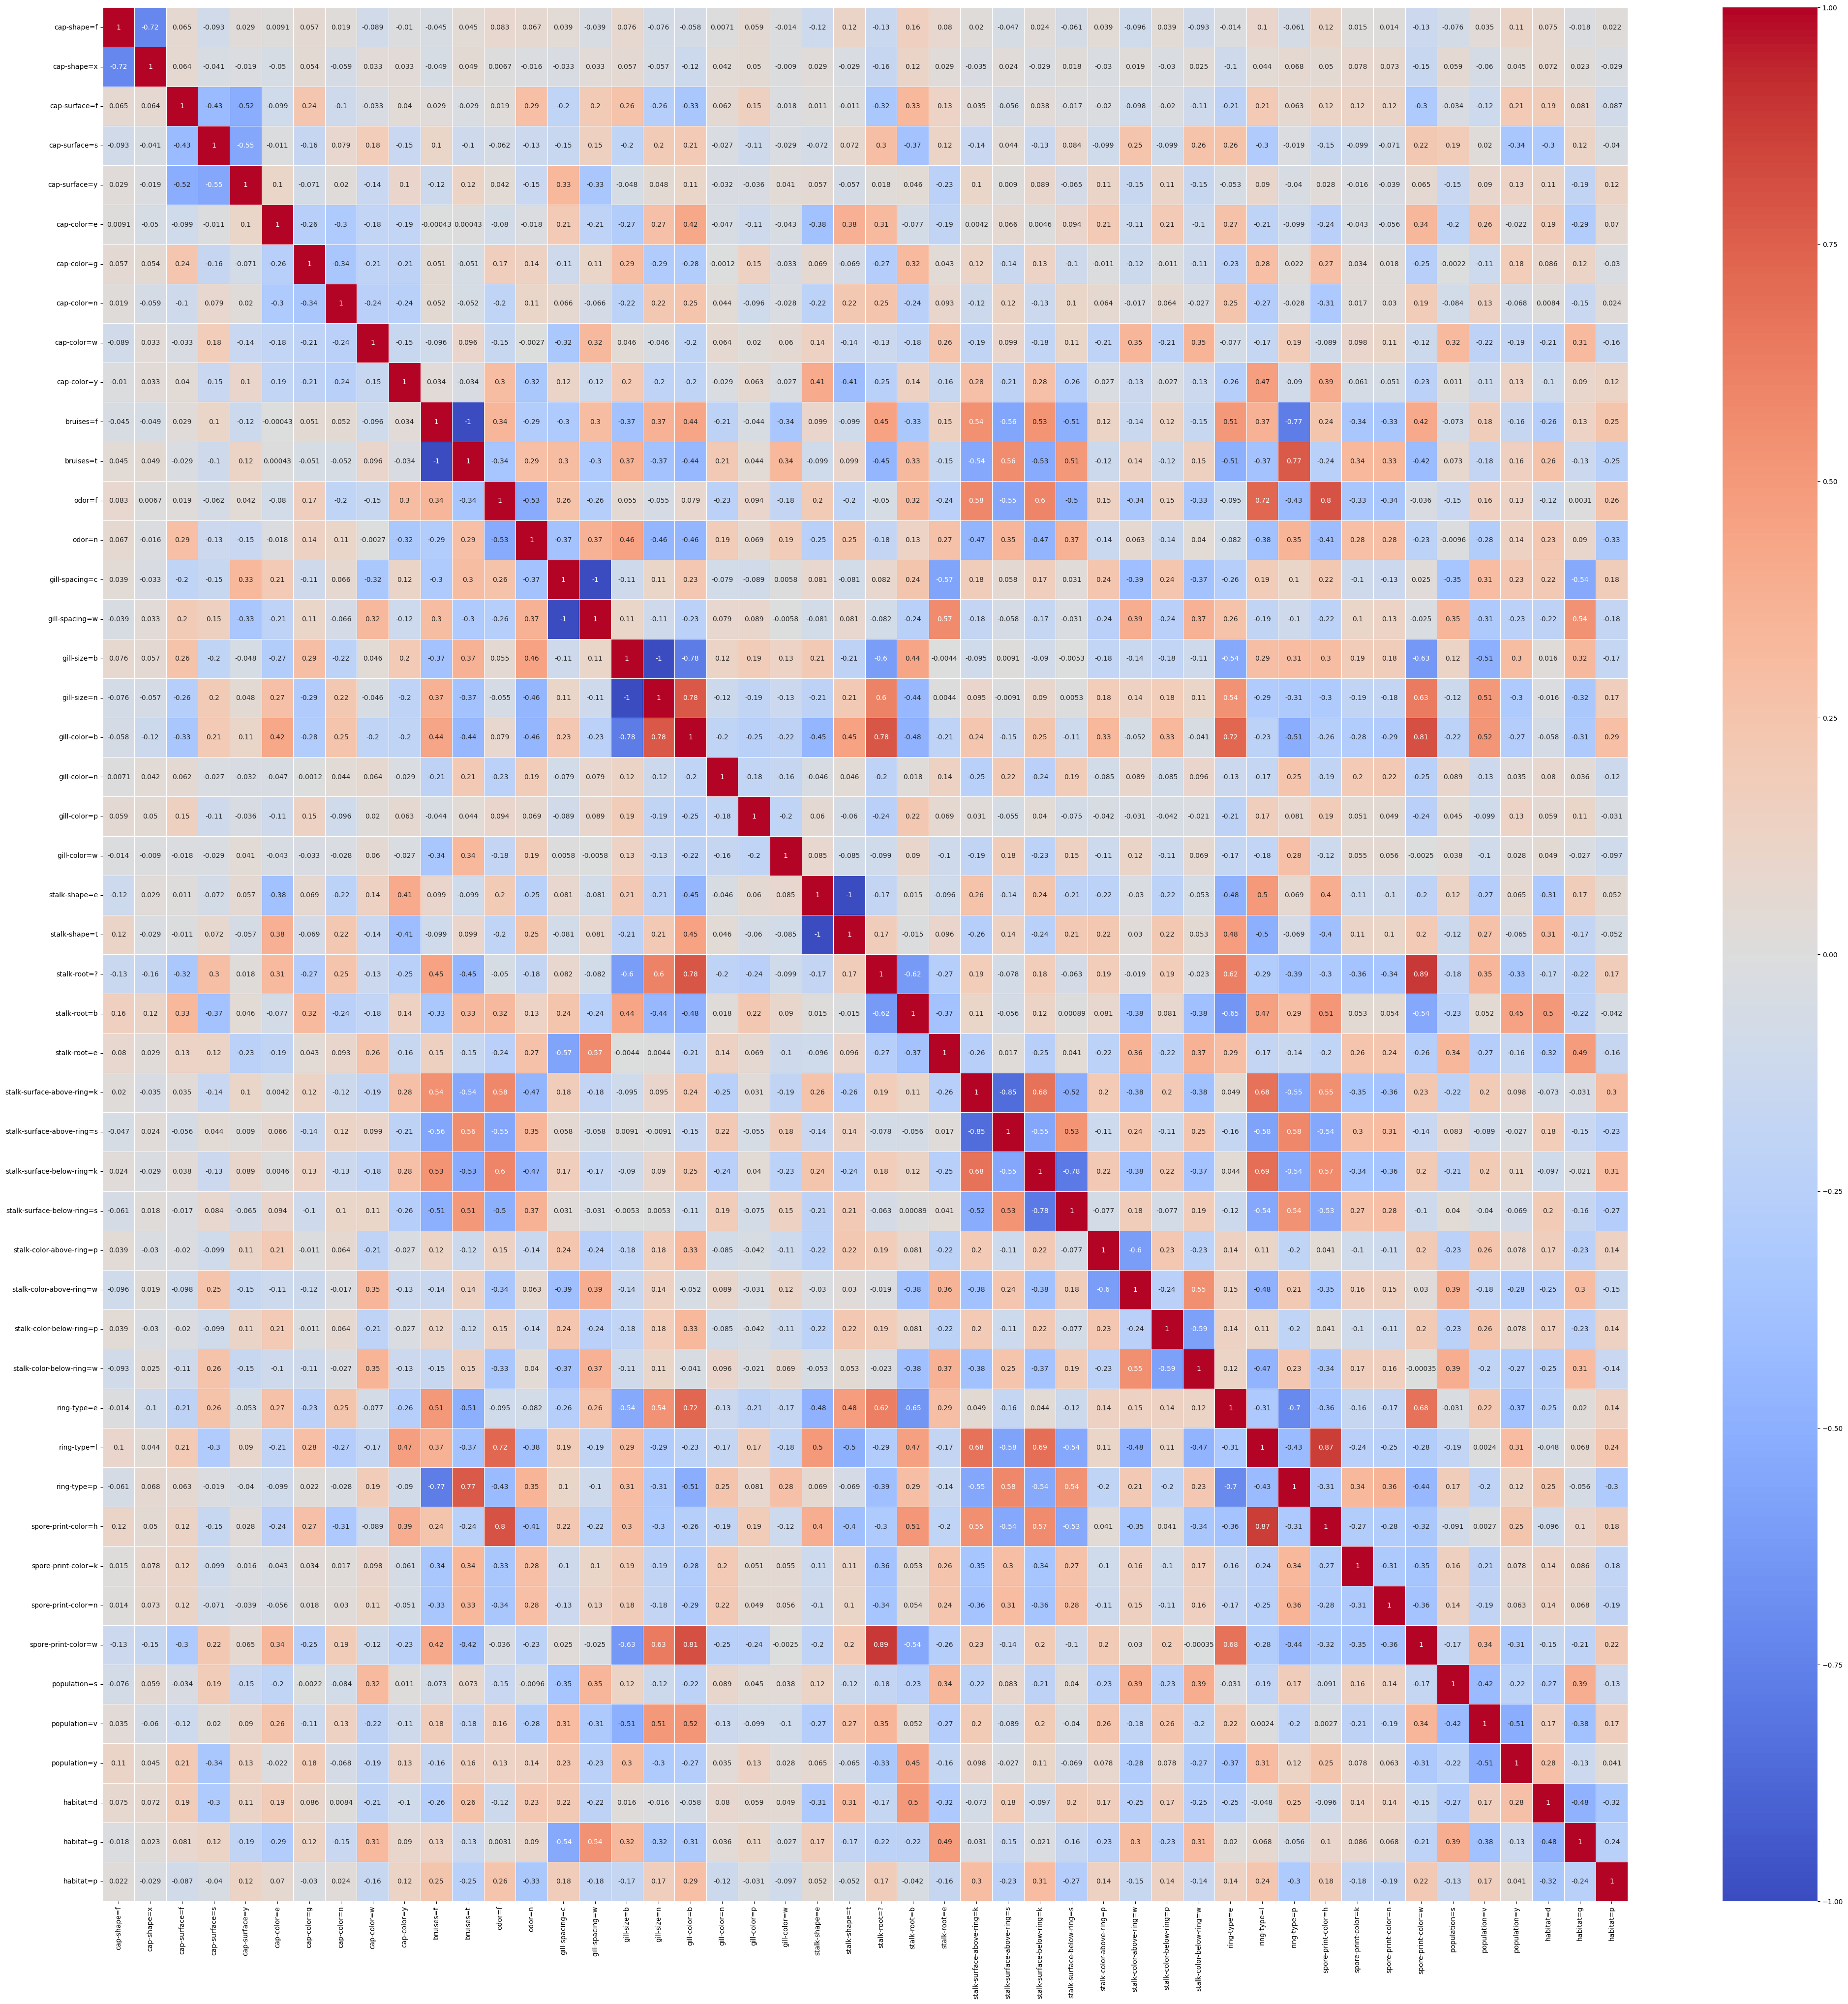

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = x_miss.corr()

plt.figure(figsize=(50, 50))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

plt.show()

The second heatpmap combines the features and the target so that i can feasibly see each feature's impact on the target class feature:

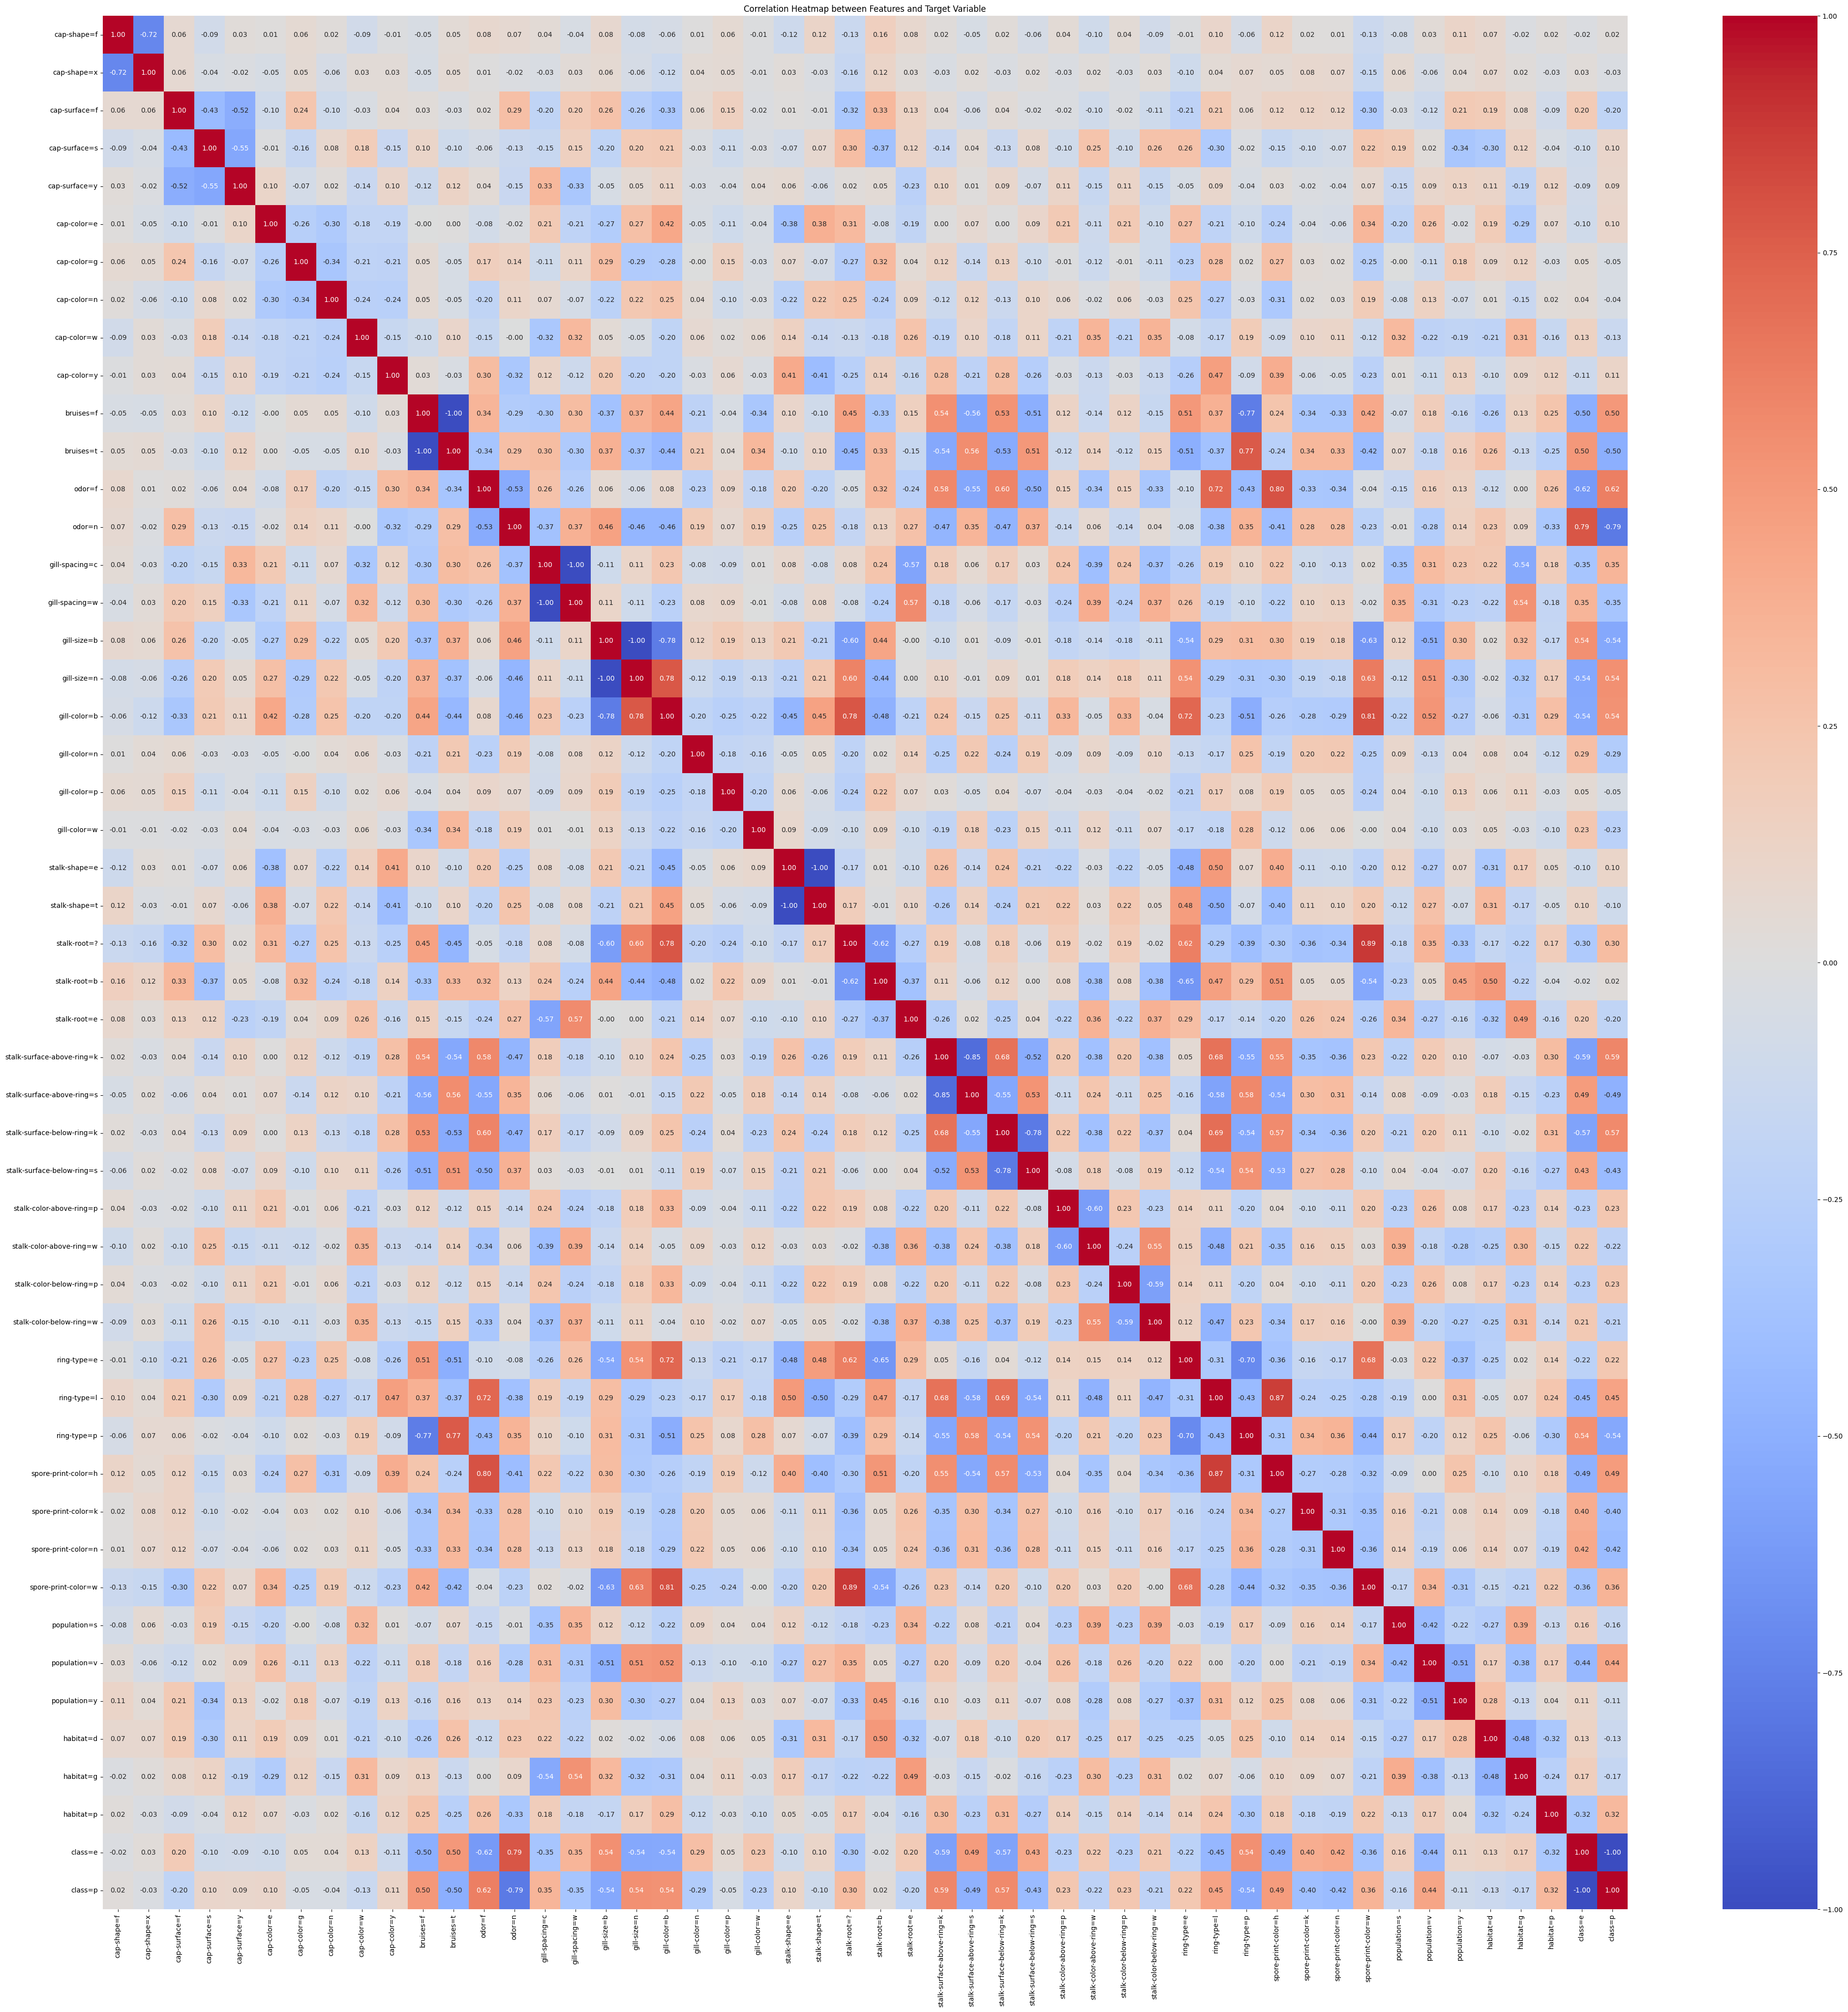

In [27]:
df_combined = pd.concat([x_miss, y], axis=1)

matrix = df_combined.corr()

plt.figure(figsize=(50, 50))
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Features and Target Variable')
plt.show()

then i moved on to the scaling the data as this is an essential step in preprocessing which would be necessary in the later stages


In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xn = sc.fit_transform(x_miss)
print(xn[0:2,]) # top  rows in x


[[-0.79620985  1.10548662 -0.63223756  1.47594165 -0.81532454 -0.47586687
  -0.54111656  1.59903649 -0.38315756 -0.38988923 -1.18591657  1.18591657
  -0.60180814 -0.87614155  0.43886364 -0.43886364 -1.49468272  1.49468272
  -0.5197777  -0.38484578 -0.47430986 -0.41671241  1.14480575 -1.14480575
  -0.66287606 -0.93190411  2.50071418 -0.64216688  0.75468654 -0.62918701
   0.80365857 -0.54719666  0.90547914 -0.54719666  0.92363531 -0.7204669
  -0.43566808  1.02341538 -0.50138441  1.82749654 -0.56540968 -0.64522709
   2.34725699 -0.99459854 -0.51671982 -0.7953846  -0.59953128 -0.40484176]
 [-0.79620985  1.10548662 -0.63223756  1.47594165 -0.81532454 -0.47586687
  -0.54111656 -0.6253766  -0.38315756  2.56483103 -1.18591657  1.18591657
  -0.60180814 -0.87614155  0.43886364 -0.43886364  0.66903831 -0.66903831
  -0.5197777  -0.38484578 -0.47430986 -0.41671241  1.14480575 -1.14480575
  -0.66287606 -0.93190411 -0.39988576 -0.64216688  0.75468654 -0.62918701
   0.80365857 -0.54719666  0.90547914 

In [29]:
x_miss.head(10)

cap-shape=f  cap-shape=x  cap-surface=f  cap-surface=s  cap-surface=y  \
0            0            1              0              1              0   
1            0            1              0              1              0   
2            0            0              0              1              0   
3            0            1              0              0              1   
4            0            1              0              1              0   
5            0            1              0              0              1   
6            0            0              0              1              0   
7            0            0              0              0              1   
8            0            1              0              0              1   
9            0            0              0              1              0   

   cap-color=e  cap-color=g  cap-color=n  cap-color=w  cap-color=y  ...  \
0            0            0            1            0            0  ...   
1            0            0            0            0            1  ...   
2            0            0            0            1            0  ...   
3            0            0            0            1            0  ...   
4            0            1            0            0            0  ...   
5            0            0            0            0            1  ...   
6            0            0            0            1            0  ...   
7            0            0            0            1            0  ...   
8            0            0            0            1            0  ...   
9            0            0            0            0            1  ...   

   spore-print-color=h  spore-print-color=k  spore-print-color=n  \
0                    0                    1                    0   
1                    0                    0                    1   
2                    0                    0                    1   
3                    0                    1                    0   
4                    0                    0                    1   
5                    0                    1                    0   
6                    0                    1                    0   
7                    0                    0                    1   
8                    0                    1                    0   
9                    0                    1                    0   

   spore-print-color=w  population=s  population=v  population=y  habitat=d  \
0                    0             1             0             0          0   
1                    0             0             0             0          0   
2                    0             0             0             0          0   
3                    0             1             0             0          0   
4                    0             0             0             0          0   
5                    0             0             0             0          0   
6                    0             0             0             0          0   
7                    0             1             0             0          0   
8                    0             0             1             0          0   
9                    0             1             0             0          0   

   habitat=g  habitat=p  
0          0          0  
1          1          0  
2          0          0  
3          0          0  
4          1          0  
5          1          0  
6          0          0  
7          0          0  
8          1          0  
9          0          0  

[10 rows x 48 columns]

based on the correlation matrix i will select only the features which have a high correlation with the target



```
# This is formatted as code
```

the selected features based on my analysis with the heat map are stored in x_corr

In [30]:
selected_columns = ['odor=n','odor=f','gill-size=b','gill-size=n','gill-color=b','stalk-surface-below-ring=k','stalk-surface-below-ring=k', 'stalk-surface-above-ring=k', 'ring-type=p' ]
x_corr = x_miss[selected_columns].copy()

In [31]:
x_corr.head(10)

odor=n  odor=f  gill-size=b  gill-size=n  gill-color=b  \
0       0       0            0            1             0   
1       0       0            1            0             0   
2       0       0            1            0             0   
3       0       0            0            1             0   
4       1       0            1            0             0   
5       0       0            1            0             0   
6       0       0            1            0             0   
7       0       0            1            0             0   
8       0       0            0            1             0   
9       0       0            1            0             0   

   stalk-surface-below-ring=k  stalk-surface-below-ring=k  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
5                           0                           0   
6                           0                           0   
7                           0                           0   
8                           0                           0   
9                           0                           0   

   stalk-surface-above-ring=k  ring-type=p  
0                           0            1  
1                           0            1  
2                           0            1  
3                           0            1  
4                           0            0  
5                           0            1  
6                           0            1  
7                           0            1  
8                           0            1  
9                           0            1

These are the selected features based on the SelectKBest method

> Indented block



In [32]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
selector= SelectKBest(chi2, k=6)
x_new= selector.fit(x_miss, y)

cols_idxs = selector.get_support(indices=True)
x_new = x_miss.iloc[:,cols_idxs]
x_new.head(10)


odor=f  odor=n  gill-size=n  gill-color=b  stalk-surface-above-ring=k  \
0       0       0            1             0                           0   
1       0       0            0             0                           0   
2       0       0            0             0                           0   
3       0       0            1             0                           0   
4       0       1            0             0                           0   
5       0       0            0             0                           0   
6       0       0            0             0                           0   
7       0       0            0             0                           0   
8       0       0            1             0                           0   
9       0       0            0             0                           0   

   stalk-surface-below-ring=k  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0  
5                           0  
6                           0  
7                           0  
8                           0  
9                           0

bar plots were plotted to easily visualize the data for significant features


the first bar plot was for feature odor=none
the second bar plot was for odor=foul
the third bar plot was for ring type=p


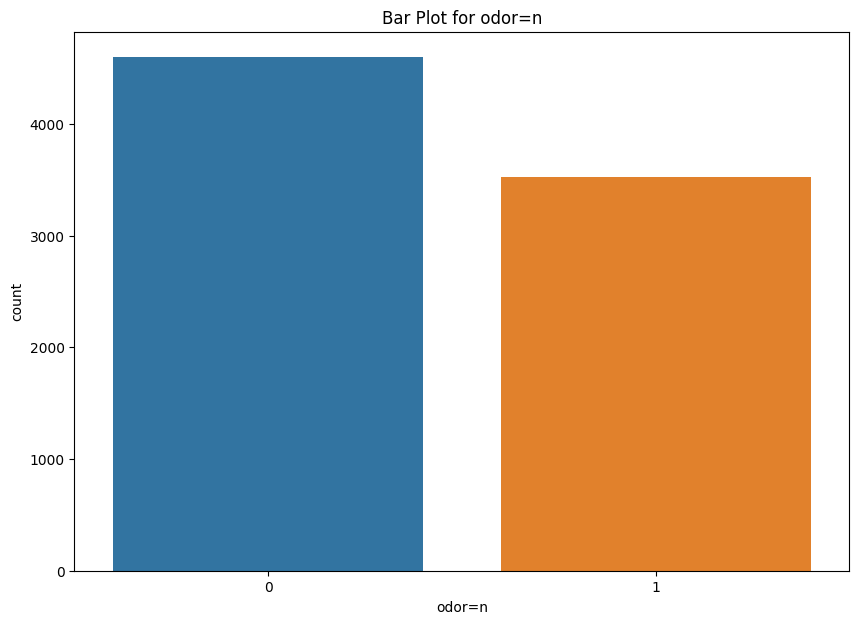

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

combined_data = pd.concat([x_var, y], axis=1)

plt.figure(figsize=(10, 7))
sns.countplot(x='odor=n', data=combined_data)
plt.title('Bar Plot for odor=n')
plt.show()

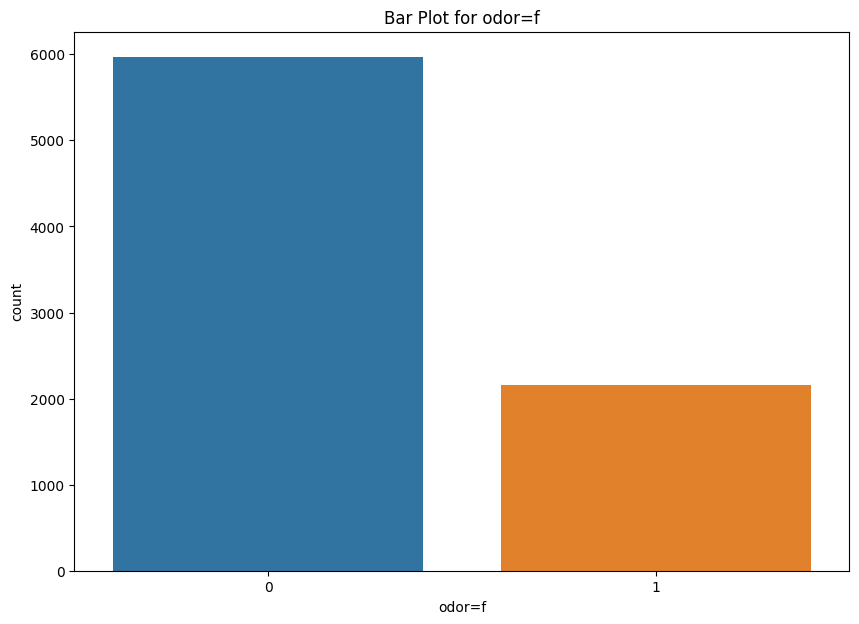

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

combined_data = pd.concat([x_var, y], axis=1)

plt.figure(figsize=(10, 7))
sns.countplot(x='odor=f', data=combined_data)
plt.title('Bar Plot for odor=f')
plt.show()

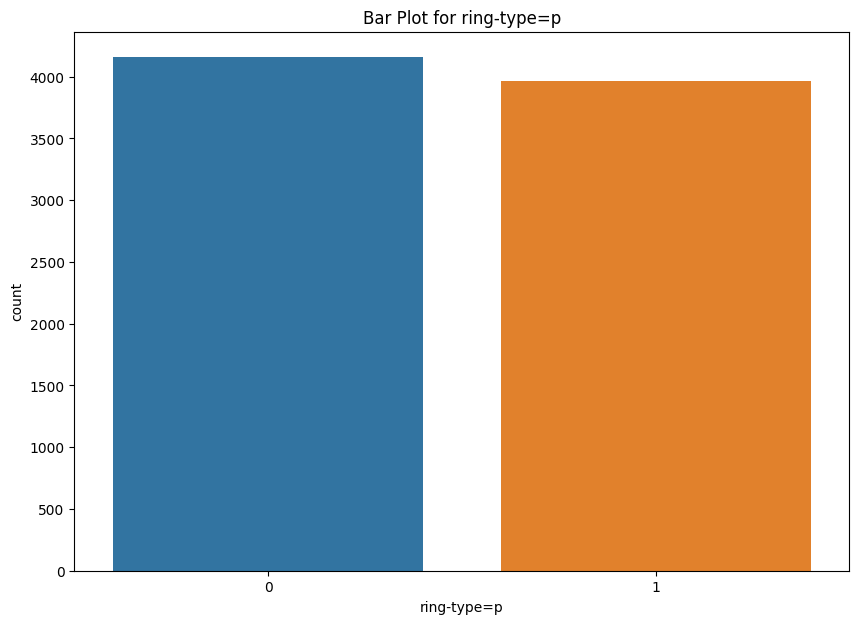

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

combined_data = pd.concat([x_var, y], axis=1)

plt.figure(figsize=(10, 7))
sns.countplot(x='ring-type=p', data=combined_data)
plt.title('Bar Plot for ring-type=p')
plt.show()

To identify a link between the number of instances where a given feature was true and how important it is with relation to a mushroom being edible or poisonous, I used a bar plot to count the instances with the feature present and absent.



a violin plot shows similar result for odor=n against class=p, showing that when there was no odor the mushrooms likely classified as poisonous





<Axes: xlabel='odor=n', ylabel='class=p'>

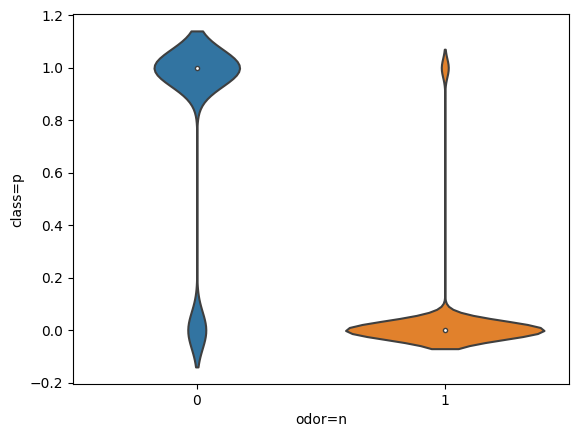

In [36]:
import seaborn as sns
sns.violinplot(x='odor=n', y='class=p', data=df)

then i split the test and train data into x and y with a test size of 0.3

In [37]:
X_train, X_test, y_train, y_test = \
train_test_split(x_corr, y, test_size=0.3, random_state=1)


In [38]:
y_train.head(10)

class=e  class=p
6848        0        1
2246        1        0
2095        1        0
4535        0        1
6865        0        1
3032        1        0
2036        1        0
1918        1        0
6639        0        1
8053        0        1

the first machine learning algorithm i focused on was the decision tree ,
I created a decision tree to visualize the data and obtain insight about the feature importance,
based on my data with features selected based on high correlation.


In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [40]:
clf = DecisionTreeClassifier()

In [41]:
clf = clf.fit(X_train, y_train)

In [42]:
from sklearn.tree import export_text
text_representation = export_text(clf)
print(text_representation)


|--- feature_0 <= 0.50
|   |--- feature_8 <= 0.50
|   |   |--- class: 0
|   |--- feature_8 >  0.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- feature_2 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  0.50
|   |   |   |   |--- class: 1
|   |   |--- feature_1 >  0.50
|   |   |   |--- class: 0
|--- feature_0 >  0.50
|   |--- feature_2 <= 0.50
|   |   |--- feature_7 <= 0.50
|   |   |   |--- feature_8 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_8 >  0.50
|   |   |   |   |--- class: 1
|   |   |--- feature_7 >  0.50
|   |   |   |--- class: 0
|   |--- feature_2 >  0.50
|   |   |--- feature_8 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_8 >  0.50
|   |   |   |--- feature_6 <= 0.50
|   |   |   |   |--- feature_7 <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_7 >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_6 >  0.50
|   |   |   |   |--- class: 1



In [43]:
!pip install graphviz
!pip install pydotplus



here is the the visualization of the decision tree:



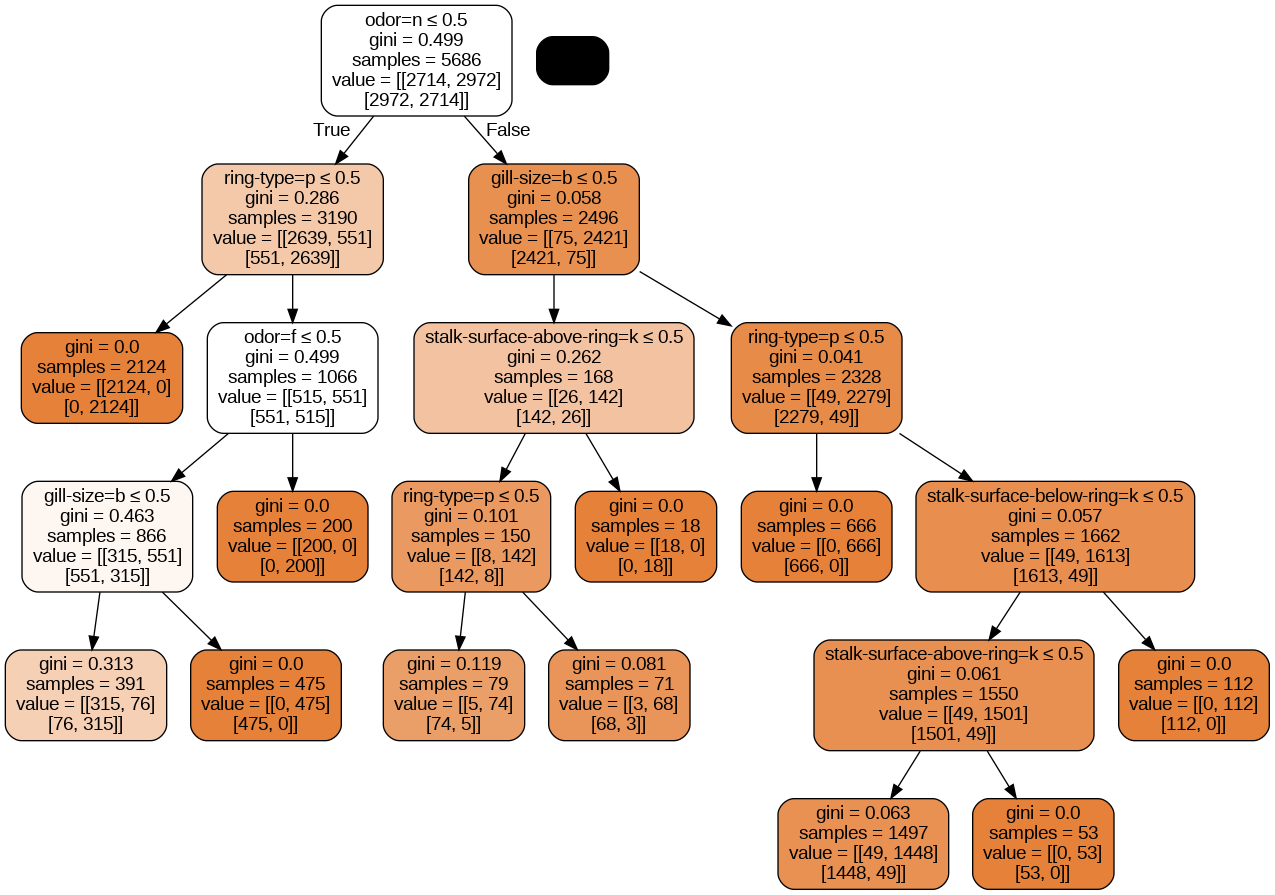

In [44]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

feature_names = [
    "odor=n", "odor=f",
    "gill-size=b", "gill-size=n",
    "gill-color=b", "stalk-surface-below-ring=k",
    "stalk-surface-below-ring=k", "stalk-surface-above-ring=k",
    "ring-type=p"
]

dot_data = StringIO()
export_graphviz(
    clf,
    out_file=dot_data,
    filled=True,
    rounded=True,
    special_characters=True,
    feature_names=feature_names,
    class_names=['Edible','Poisonous']
)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('heart.png')
Image(graph.create_png())

Max depth:5
Number of leaves:11
Feature weights: [6.83357330e-01 5.05028756e-02 0.00000000e+00 1.09026568e-01
 0.00000000e+00 8.01503598e-05 0.00000000e+00 1.11008747e-02
 1.45932202e-01]

In [45]:
print(f'Max depth:{clf.get_depth()}')
print(f'Number of leaves:{clf.get_n_leaves()}')
print(f'Feature weights:{clf.feature_importances_}')


Max depth:5
Number of leaves:11
Feature weights:[6.83357330e-01 5.05028756e-02 1.09026568e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 8.01503598e-05 1.11008747e-02
 1.45932202e-01]


In [46]:
feature_importances = clf.feature_importances_

feature_importance_dict = dict(zip(feature_names, feature_importances))

for feature, importance in feature_importance_dict.items():
    print(f"{feature}: {importance}")

odor=n: 0.6833573297816181
odor=f: 0.050502875640208604
gill-size=b: 0.10902656781651993
gill-size=n: 0.0
gill-color=b: 0.0
stalk-surface-below-ring=k: 8.015035976044119e-05
stalk-surface-above-ring=k: 0.011100874651793493
ring-type=p: 0.1459322017500995


Observing the analysis of the feature weights , the highest feature score was the first feature odor=n with a feature score of 0.683 indicating that this is the most important feature and the second highest although not very significant feature is the ring-type=p, which was 0.1459
There were features with  a score of 0.0 indicating that they didn’t provide meaningful insight into predicting the data however I did not drop the features as the feature may not have been well captured by the decision tree and may be beneficial in other context, due to high correlation in the heatmap with the target variable


In [47]:
y_pred = clf.predict(X_test)
y_pred

array([[1, 0],
       [0, 1],
       [0, 1],
       ...,
       [0, 1],
       [1, 0],
       [0, 1]])

In [48]:
from sklearn.metrics import accuracy_score
print("Train Accuracy :", accuracy_score(y_train, clf.predict(X_train)))
print("Accuracy of test:",accuracy_score(y_test, y_pred))


Train Accuracy : 0.9766092156173056
Accuracy of test: 0.9790812141099262


In [49]:
from sklearn.metrics import multilabel_confusion_matrix

cm = multilabel_confusion_matrix(y_test, y_pred)

for i in range(len(cm)):
    print(f"Confusion matrix for class {i + 1}:\n", cm[i])

Confusion matrix for class 1:
 [[1171   31]
 [  20 1216]]
Confusion matrix for class 2:
 [[1216   20]
 [  31 1171]]


The confusion matrix clearly indicates the high proportion of True positive (TP) and True Negative (TN) values which indicates the high, accuracy precision and recall for the whole matrix
To confirm this I printed the classification _report which clearly displayed the strong precision, recall and f1 scores


In [50]:
  from sklearn.metrics import classification_report

  print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1236
           1       0.98      0.97      0.98      1202

   micro avg       0.98      0.98      0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438
 samples avg       0.98      0.98      0.98      2438



Building a neural network to predict the outcome,A neural network comprising of 3 layers, an input layer with 9 neurons, a hidden layer with 16 neurons (Relu Activation) and another hidden layer with 12 neurons (Relu activation) and an output layer with 2 neurons (Softmax activation)
Th model was trained for 100 epochs with a batch size of 64
The loss function used was categorical crossentropy, the adam optimizer was used, and the accuracy was the metric to monitor while training


In [51]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [52]:
model = Sequential()
model.add(Dense(16, input_dim=9, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(2, activation='softmax'))


In [53]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [54]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
89/89 [==============================] - 1s 2ms/step - loss: 0.4871 - accuracy: 0.8199
Epoch 2/100
89/89 [==============================] - 0s 2ms/step - loss: 0.2160 - accuracy: 0.9399
Epoch 3/100
89/89 [==============================] - 0s 2ms/step - loss: 0.1507 - accuracy: 0.9492
Epoch 4/100
89/89 [==============================] - 0s 2ms/step - loss: 0.1214 - accuracy: 0.9766
Epoch 5/100
89/89 [==============================] - 0s 2ms/step - loss: 0.1061 - accuracy: 0.9766
Epoch 6/100
89/89 [==============================] - 0s 2ms/step - loss: 0.0982 - accuracy: 0.9766
Epoch 7/100
89/89 [==============================] - 0s 2ms/step - loss: 0.0941 - accuracy: 0.9766
Epoch 8/100
89/89 [==============================] - 0s 2ms/step - loss: 0.0917 - accuracy: 0.9766
Epoch 9/100
89/89 [==============================] - 0s 2ms/step - loss: 0.0900 - accuracy: 0.9766
Epoch 10/100
89/89 [==============================] - 0s 2ms/step - loss: 0.0882 - accuracy: 0.9766
Epoch 11/

In [55]:
pred = np.argmax(y_pred, axis=1)
test = np.argmax(y_test.values, axis=1)

from sklearn.metrics import accuracy_score
a = accuracy_score(pred, test)
print('Accuracy is:', a * 100)

Accuracy is: 97.90812141099262


After the first few epochs about 5 or 6 the model steeped up to over 97.9% , it then remained constant at this rate, it rapidly learned patterns and relationships in the data, in fact it could be said that it could have reached a point where if I trained further epochs, it would not further improve the model.

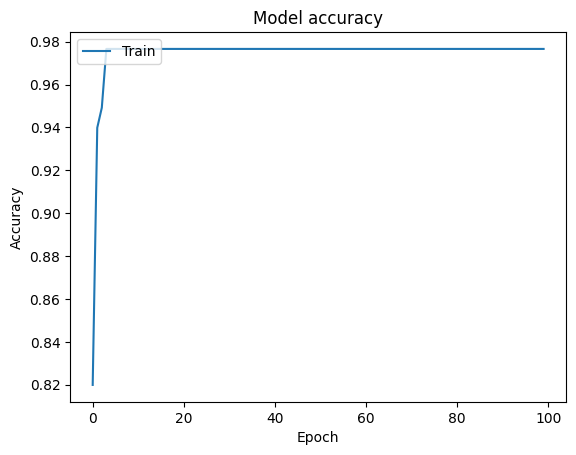

In [56]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160       
                                                                 
 dense_1 (Dense)             (None, 12)                204       
                                                                 
 dense_2 (Dense)             (None, 2)                 26        
                                                                 
Total params: 390 (1.52 KB)
Trainable params: 390 (1.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


i then created a support vector machines Since SVM alggorithm caters to binary classification, the algorithm would be ideal to classify the mushrooms as either edible or poisonous


In [58]:
from sklearn import svm
import numpy as np

y_train_array = y_train.to_numpy()
y_train_labels = np.argmax(y_train_array, axis=1)

clf = svm.SVC()
clf.fit(X_train, y_train_labels)

ypredict = clf.predict(X_test)
ypredict

array([0, 1, 1, ..., 1, 0, 1])

In [59]:
y_test_array = y_test.to_numpy()
y_test_labels = np.argmax(y_test_array, axis=1)
accuracy = accuracy_score(y_test_labels, ypredict)
class_report = classification_report(y_test_labels, ypredict)
print("acccuracy")
print(accuracy)
print("Classification Report:")
print(class_report)

acccuracy
0.9790812141099262
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1236
           1       0.98      0.97      0.98      1202

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438



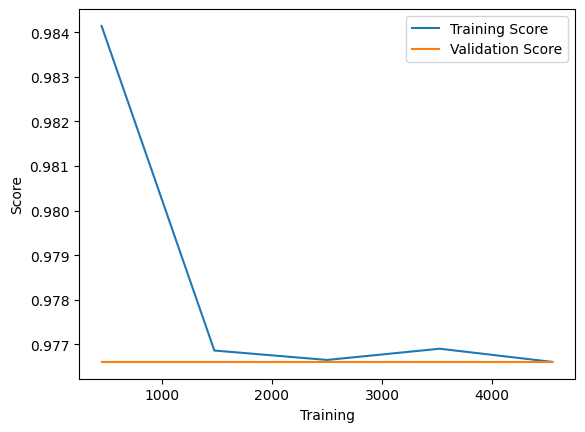

In [60]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(clf,X_train, y_train_labels, cv=5)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Validation Score')
plt.xlabel('Training')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

SVM’s are known for good generalization performance. In order to evaluate the model’s performance on unseen data, Cross validation is a technique which gives insights on how the model is able to generalize.

i also plotted a graph to compare the training score with the validation score to see if the model was underfitting or overfitting, the model shown respresented a good learning curve

In [61]:
from sklearn.model_selection import cross_val_score
from sklearn import svm

#kernel was set to linear to simplify the model
clf = svm.SVC(kernel='linear')

#cv is the number of folds
cv_scores = cross_val_score(clf, X_train, y_train_labels, cv=5)

print("Scores:", cv_scores)

print("Mean Score:", np.mean(cv_scores))
print("Standard Deviation", np.std(cv_scores))

Scores: [0.97891037 0.97273527 0.97889182 0.97713281 0.97537379]
Mean Score: 0.976608810840973
Standard Deviation 0.0023372411640191805


The scores represent the performance of the AI model on different sets of the training data.
Each value shows the accuracy on one-fold of cross validation, with a total of 5 folds.
The mean score is about 0.9766 which shows that the model is highly accurate.
And the standard deviation is about 0.0023 which is a small value and indicates that the model is consistent upon training.


Overall, exploring the Mushroom Records Information dataset allowed me to obtain valuable insights for distinguishing mushrooms for classification, key attributes strongly pertaining to the classification of mushrooms were portrayed visually through the heatmap. Most prominently, the absence of odor proved to be a high indicator of mushroom edibility, whereas foul odor showed high significance to poisonous mushrooms, other features such as gill color being buff and some stalk feature characteristics like the stalk surface above and below ground being silky also correlated with poisonous mushrooms.
The decision tree model, which was made on selected features of high correlation represented the feature importance, and the confusion matrix reaffirmed the recall and precision. The deep learning capabilities of the neural network displayed applaudable accuracy which narrowed down over the epochs. The combined insights from decision tree algorithm, neural networks and SVM algorithm with cross validation provided an accurate approach to classify the mushroom dataset.
